# Анализ интернет-магазина видеоигр "Стримчик"

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Инструкция по выполнению проекта

#### Шаг 1. Откройте файл с данными и изучите общую информацию
- путь к файлу: /datasets/games.csv.

#### Шаг 2. Подготовьте данные
- замените названия столбцов (приведите к нижнему регистру);
- преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- обработайте пропуски при необходимости:
- объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- опишите причины, которые могли привести к пропускам;
- обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### Шаг 3. Проведите исследовательский анализ данных
- посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- не учитывайте в работе данные за предыдущие годы.
- какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- соотнесите выводы с продажами игр на других платформах.
- посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Шаг 4. Составьте портрет пользователя каждого региона
- определите для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5). Опишите различия в долях продаж.
- самые популярные жанры (топ-5). Поясните разницу.
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Шаг 5. Проверьте гипотезы
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- задайте самостоятельно пороговое значение alpha.
- поясните:
    - как вы сформулировали нулевую и альтернативную гипотезы;
    - какой критерий применили для проверки гипотез и почему.

#### Шаг 6. Напишите общий вывод

## Открытие файла и изучение общей информации

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# прочитаем файл и сохраним его в переменную 'data'
data = pd.read_csv('/datasets/games.csv')

In [3]:
# создадим функцию для быстрого просмотра всей нужной информации нашего датафрейма
def display_and_info(data):
    display(data.head())
    display(data.info())
    display(data.describe())

In [4]:
# посмотрим на наш датафрейм
display_and_info(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Вывод

- В датафрейме наименования столбцов начинаются с заглавных букв. Необходимо это исправить
- В шести столбцах имеются пропуски. Необходимо уточнить по какой причине образовались пропуски и длаее уже решить заменить их медианным значением или вовсе удалить
- В трёх столбцах неправильный тип данных. Необходимо изменить тип данных на корректный

## Предобработка данных

### Приведём наименования столбцов к единому стилю

In [5]:
# приведем наименования столбцов к нижнему регистру
data.columns = data.columns.str.lower()
# постотрим на наименования столбцов
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Посмотрим на пропуски в столбцах

In [6]:
# посмотрим на конкретные 2 строки с пропусками в столбце 'name'
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# посмотрим на конкретные 2 строки с пропусками в столбце 'genre'
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Два пропуска в столбце с наименованием игры идентичны двум пропускам в столбце с жанром. Скорее всего их природа появления одинакова. Наименование игры ещё полностью не определили, а жанр возможно был "смесью" нескольких жанров и не имел конкретного наименования в 1993 году. Удалим данные строки из датафрейма, т.к. на ход исследования это не повлияет.

In [8]:
# удалим пропуски в столбцах 'name' и 'genre'
data = data.dropna(subset=['name', 'genre'])

In [9]:
# посмотрим на количество пропусков в столбце 'year_of_release'
data['year_of_release'].isna().sum()

269

В данном столбце мы не можем заменить пропуски медианным значением, т.к. это будет некорректно делать в столбце с годом выхода видеоигры. Возможно пропуски появились из-за отсутствия точного года выпуска. Удалим данные строки, т.к. они не повлияют на ход исследования.

In [10]:
# удалим пропуски в столбце 'year_of_release'
data = data.dropna(subset=['year_of_release'])

Посмотрим еще раз на количество строк в нашем датафрейме после удаления небольшого количества строк из 3х стоблцов

In [11]:
# посмотрим на количество строк
data.count()

name               16444
platform           16444
year_of_release    16444
genre              16444
na_sales           16444
eu_sales           16444
jp_sales           16444
other_sales        16444
critic_score        7983
user_score          9839
rating              9768
dtype: int64

In [12]:
# посмотрим на список уникальных значений в столбце 'critic_score'
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [13]:
# посмотрим на количество пропусков в столбце 'critic_score'
data['critic_score'].isna().sum()

8461

Количество пропусков больше 50% ( 8461 / 16444 = 51,45% ). Заменять их медианным значением или удалять нельзя. Оставляем пропуски, т.к. это повлияет на дальнейший ход исследования.

In [14]:
# посмотрим на список уникальных значений в столбце 'user_score'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце 'user_score' среди уникальных значений есть одна аббревиатура "tbd", что означает To Be Determined ("предстоит определить", "будет определено"). Заменим на NaN. Данный столбец должен иметь по списку уникальных значений тип данных 'float' и содержать оценки состоящие из дробных чисел. Изменим сразу же тип данных на 'float'.

In [15]:
# заменяем все 'tbd' на NaN
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype('float64')

In [16]:
# посмотрим на количество пропусков в столбце 'user_score'
data['user_score'].isna().sum()

8981

Количество пропусков почти 55% ( 8981 / 16444 = 54,61% ). Заменять их медианным значением или удалять нельзя. Оставляем пропуски, т.к. это повлияет на дальнейший ход исследования.

In [17]:
# посмотрим на список уникальных значений в столбце 'rating'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Тут мы видим буквенные обозначения рейтинга видеоигр. Перейдя на сайт организации ESRB (Entertainment Software Rating Board) мы увидим что каждая категория означает:
- E . Подходит для всех возрастных категорий
- M . Походит для лиц старше 17 лет
- T . Подходит для лиц старше 13 лет
- E10+ . Подходит для лиц от 10 лет и старше
- K-A . Подходит для лиц от 10 лет и старше (более старое обозначение E10+)
- AO . Подходит для лиц старше 18 лет
- EC . Подходит для детей младшего возраста
- RP . Рейтинг ожидается (ещё не присвоен)

Переименуем буквенные обозначения рейтинга в более читаемый формат согласно перечню выше.

In [18]:
# переименуем буквенные обозначения рейтинга в категории
rat = {'E': 'Подходит для всех',
      'M': 'Для лиц старше 17 лет',
      'T': 'Для лиц старше 13 лет',
      'E10+': 'Для лиц старше 10 лет',
      'K-A': 'Для лиц старше 10 лет',
      'AO': 'Для лиц старше 18 лет',
      'EC': 'Для детей младшего возраста',
      'RP': 'Рейтинг не присвоен',
       np.nan: 'Нет рейтинга'
      }

data['rating'] = data['rating'].replace(rat)

In [19]:
# посмотрим сколько игр не имеют присвоеного рейтинга
data[data['rating'] == 'Рейтинг не присвоен']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,Рейтинг не присвоен


In [20]:
# посмотрим на количество пропусков в столбце 'rating'
data['rating'].isna().sum()

0

Количество пропусков больше 40% ( 6676 / 16444 = 40,59% ). Заменять их медианным значением или удалять нельзя. Оставляем пропуски, т.к. это повлияет на дальнейший ход исследования. Пропуски возможно появились из-за технической проблемы при выгрузке данных. Ранее можно было ещё предположить, что пропуски это видеоигры недавно вышедшие и им ещё просто не присвоен рейтинг, но как мы видим немного выше рейтинг не присвоенных игр только у одной и вышла она в 2011 году.

Изменим типы данных в столбце 'year_of_release' на 'int', т.к. год указывается целым числом.

In [21]:
# изменим тип данных в столбце 'year_of_release'
data['year_of_release'] = data['year_of_release'].astype('int64')

Также необходимо было изменить тип данных у столбца 'critic_score' на 'int' (в списке уникальных значений только целые числа), но из-за большого количества пропусков которые не можем удалить, т.к. это повлияет на ход исследования, мы оставим тип данных, что есть.

### Проверим на дубликаты

In [22]:
# проверим датафрейм на наличие явных дубликатов
data.duplicated().sum()

0

Дубликатов нет

In [23]:
# проверим наш датафрейм ещё на наличие неявных дубликатов
data.groupby('name')['platform'].value_counts().sort_values()

name                         platform
 Beyblade Burst              3DS         1
Rapala Tournament Fishing!   X360        1
Rapala Trophies              PSP         1
Rapala for Kinect            X360        1
Rapala's Fishing Frenzy      Wii         1
                                        ..
Hallowed Legends: Samhain    PC          1
Halo 3                       X360        1
Madden NFL 13                PS3         2
Need for Speed: Most Wanted  X360        2
                             PC          2
Name: platform, Length: 16441, dtype: int64

Мы видим, что есть 3 дубликата у игр на одной и той же платформе. Посмотрим каждый из них и постараемся разобраться почему они появились.

In [24]:
# смотрим на строки дубликаты у видеоигры 'Madden NFL 13' на PS3
data[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,Подходит для всех
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,Подходит для всех


In [25]:
# смотрим на строки дубликаты у видеоигры 'Need for Speed: Most Wanted' на X360
data[(data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'X360')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,Для лиц старше 13 лет
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,Для лиц старше 13 лет


In [26]:
# смотрим на строки дубликаты у видеоигры 'Need for Speed: Most Wanted' на PC
data[(data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'PC')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82.0,8.5,Для лиц старше 13 лет
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82.0,8.5,Для лиц старше 13 лет


- в случае с видеоигрой 'Madden NFL 13' на PS3 мы видим, что строки идентичны, разница только в столбцах с продажами. Скорее всего данные продублировались из какого-то второго источника. В любом случае оставляем первую строку.
- в случае с видеоигрой 'Need for Speed: Most Wanted' на X360 и PC мы видим, что строки впервую очередь отличаются годом выхода игры. Видеоигра 'Need for Speed: Most Wanted' вышла в 2005 году, а значит мы оставляем строки этой видеоигры только с этим годом выхода. При выгрузке из двух источников возможно был присвоен некорректный год релиза, либо это вовсе другая игра и по этой же тех. причине видеоигра добавилась в наш датафрейм.

In [27]:
# удаляем строки-дубликаты
data = data.drop(index=[16230, 1190, 11715])

In [28]:
# проверим типы данных всех столбцов и количество строк
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           16441 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Создадим новый столбец в котором посчитаем суммарные продажи во всех регионах

In [29]:
# создадим новый столбец 'total_sales'
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,Подходит для всех,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,Подходит для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,Подходит для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Нет рейтинга,31.38


Вывод:

- проверили на наличие дубликатов. Удалили 3 неявных дубликата.
- привели названия столбцов к нижнему регистру
- удалили пропуски в столбцах там где это возможно и не повлияет на ход исследования. Пропуски связаны скорее всего с тем, что:
    - видеоигра вышла давно и в те времена не было нужды в постоянных оценках критиков и пользователей
    - видеоигра вышла недавно и ещё не образовался рейтинг критиков и пользователей
    - технические проблемы при выгрузке данных, т.е. потеря как раз этих данных
- изменили тип данных к правильному в тех столбцах где смогли
- в столбце средь уникальных значений обнаружили аббревиатуру "tbd", что означает To Be Determined ("предстоит определить", "будет определено"). Заменили на NaN
- переименовали в столбце "rating" буквенные обозначения организации ESRB в легко читаемый вид
- создали новый столбец с общими продажами по миру

## Исcледовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

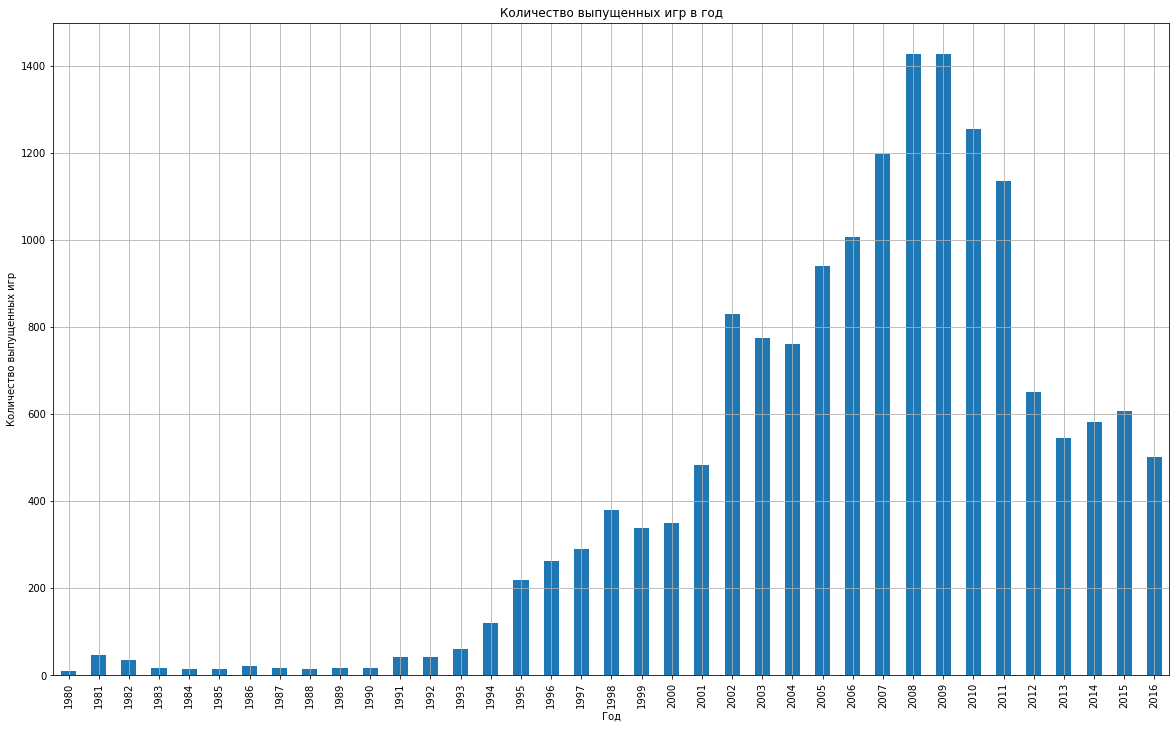

In [30]:
# Создадим переменную по которой сделаем график распределения выхода игр по годам
games_count_year = data.groupby('year_of_release')['name'].count()
games_count_year.plot(kind='bar', figsize=(20, 12), grid=True)
plt.title('Количество выпущенных игр в год')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.show()

До 1995 года игры выпускались в маленьком количестве. С 1995 количеств игр впервые перевалило за 200 игр в год и начало расти. Пик роста пришёлся на 2008-2009 год и потом пошёл небольшой спад до 2011 года включительно. с 2012 года наблюдается резкий спад почти в 2 раза от 2011 года. Предлагаю брать отсчёт с 1995 года.

### Посмотрим какая платформа самая продаваемая в нашем датафрейме.

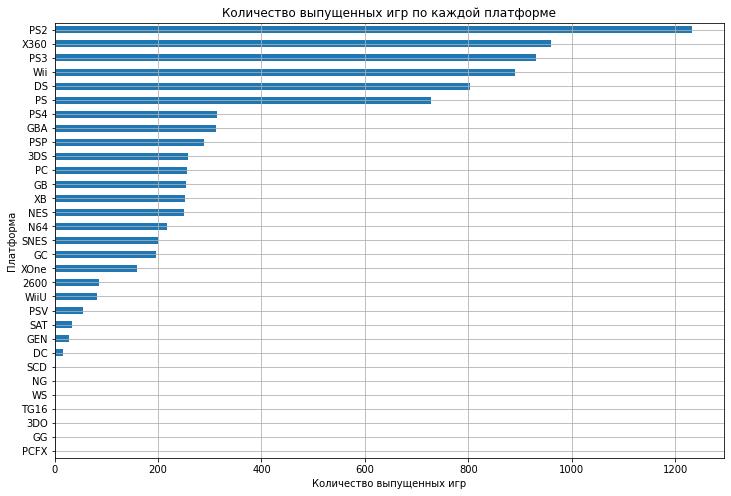

In [31]:
# Создадим переменную по которой посмотрим самые продаваемые видеоигры по платформам
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values()
platform_sales.plot(kind='barh', figsize=(12, 8), grid=True)
plt.title('Количество выпущенных игр по каждой платформе')
plt.xlabel('Количество выпущенных игр')
plt.ylabel('Платформа')
plt.show()

Тут мы видим неоспоримое преимущество платформы PS2, далее идёт пятёрка платформ с небольшими отставаниями друг от друга. На 7 месте если посмотреть идёт платформа PS4, у неё столь маленькие показатели (перед платформами своего семейства PS2 и PS3), т.к. она относительно недавно вышла, учитывая, что у нас самый поздний год выпуска видеоигр - 2016. Аналогичная ситуация и с XOne (её предшественник X360). Также как и PS4, XOne ещё возьмут своё спустя время.

Посмотрим список Топ-6 платформ c их показателями общих продаж. Постараемся определить характерный "срок жизни" платформы, увидеть их взлёты и падения.

In [32]:
# Посмотрим на числовые показатели нашего топ-6
top_6_platforms = platform_sales.sort_values(ascending=False).head(6)
top_6_platforms

platform
PS2     1233.56
X360     959.68
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
Name: total_sales, dtype: float64

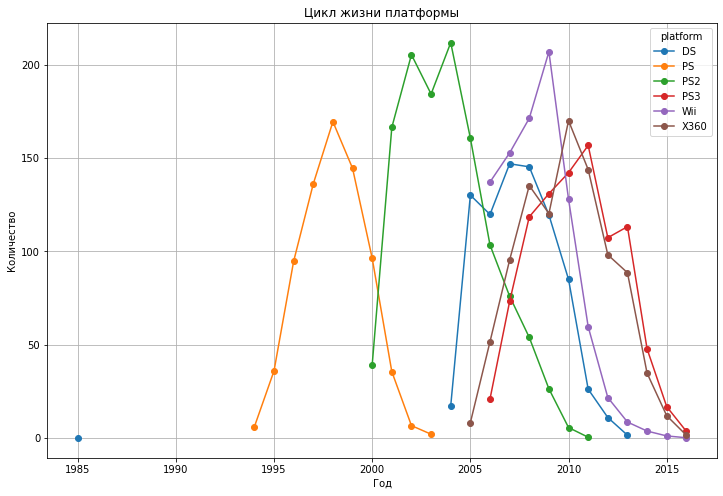

In [33]:
# Создадим список топ-6 платформ для анализа
platforms = top_6_platforms.index.tolist()
# Сгруппируем список по годам и платформам
platform_sales_year = data[data['platform'].isin(platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
#
platform_sales_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True)
plt.title('Цикл жизни платформы')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

Очень странно видеть, что есть точка на графике в 1985 году у платформы DS (Nintendo DS), которая была выпущена только в 2004 году. Необходимо найти и удалить эти данные.

In [34]:
# Находим строку где платформа 'DS' и год релиза игры 1985
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Нет рейтинга,0.02


In [35]:
# Удаляем строку с неккорректным годом релиза
data = data.drop(index=15957)

Оказалось, что это была одна игра с неправильным годом выхода. Удалили её

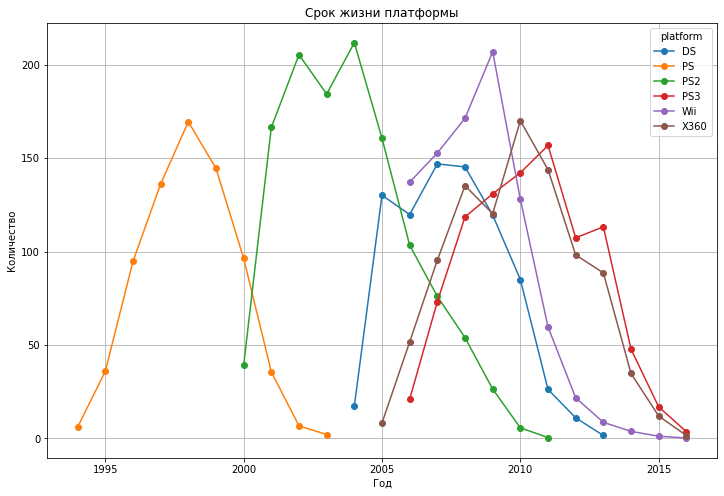

In [36]:
# Создадим список топ-6 платформ для анализа
platforms = top_6_platforms.index.tolist()
# Сгруппируем список по годам и платформам
platform_sales_year = data[data['platform'].isin(platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
# Построим линейный график "срока жизни" каждой платформы из нашего топ-6
platform_sales_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True)
plt.title('Срок жизни платформы')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

Если посмотреть на график, то средний "срок жизни" платформы в среднем составляет:
- DS c 2004 по 2013 год (10 лет)
- PS с 1994 по 2003 год (10 лет)
- PS2 с 2000 по 2011 год (12 лет)
- PS3 с 2006 по 2016 год (11 лет)
- Wii с 2006 по 2016 год (11 лет)
- X360 с 2005 по 2016 год (10 лет)

Также мы видим на графике, что платформы PS3, Wii и X360 в 2016 году все идут к 0. Безусловно, на 2016 год у PS3 есть усовершенственная версия в семействе - PS4 (которой в графике нет, т.к. она не топ-6), а у X360 есть - XOne (по тем же причинам, что и PS4 нет на графике). У платформы Wii нет предшественника и на графике видно, что она уже в 2015 году очень близка к 0 в отличии от PS3 и X360, у которых конечно уже наблюдается спад, но всё же ещё год точно они продавались бы. Это всё к тому, что скорее всего за 2016 год представлена информацию не за весь год, а за "n"-количество месяцев, которые мы не можем в нашем датафрейме уточнить.

Считаю правильным взять "срок жизни" платформы в 11 лет. Значит берём года выпуска с 2006 по 2016 включительно.

### "Актуальный период"

Ранее мы выяснили, что "срок жизни" платформы в среднем составляет 11 лет, но до пика после выхода в среднем 3-4 года у нашего топ-6. В связи с этим "актуальный период" предлагаю взять с 2013 года по 2016 год (2016 не полный в нашем датафрейме). Как раз в 2013 году вышли 2 новые популярные платформы: PS4 и XOne.

In [37]:
# Создадим переменную в которой строки даты выхода будут равны 2013 году или позднее
actual_period = data.query('year_of_release >= 2013')
# Посмотрим на первые 10 строк
actual_period.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,Для лиц старше 17 лет,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,Для лиц старше 17 лет,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Нет рейтинга,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Нет рейтинга,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,Для лиц старше 17 лет,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Нет рейтинга,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,Для лиц старше 17 лет,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,Для лиц старше 17 лет,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,Нет рейтинга,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,Подходит для всех,8.58


In [38]:
# Сгруппируем нашу таблицу где будут суммироваться общие продажи по каждой платформе за каждый год
actual_platforms_sales_year = actual_period.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
actual_platforms_sales_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


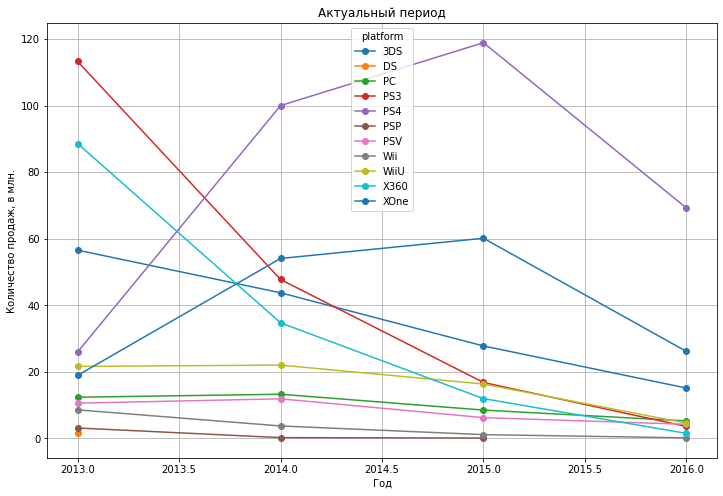

In [39]:
# Построим график актуальных платформ с 2013 по 2016 год включительно где будет видно начало роста, пик и постепенное угасание
actual_platforms_sales_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True)
plt.title('Актуальный период')
plt.xlabel('Год')
plt.ylabel('Количество продаж, в млн.')
plt.show()

Из построенного графика за "актуальный период" видно, что все платформы идут на спад, кроме двух - PS4 и XOne.
- PS4 пришла как раз в 2013 году на смену PS3 и в связи с этим у PS3 наблюдается резкий спад
- XOne пришла на смену X360 в 2013 году и также как и с PS3 у X360 наблюдается резкий спад (хотя на графике топ-6 спад резкий начался ещё до выхода XOne после пика в 2010 году).

Вывод получается такой, что потенциально-прибыльных платформ только 2:
- PS4
- XOne

У этих двух платформ будут расти продажи скорее всего до появления новых консолей своих компаний.

Потенциально-убыточными платформами можно назвать также 2 (не берём PS3 и X360):
- PSV. После выхода её в 2011 году у её предшественницы PSP стали продажи ещё хуже (хотя они и до выхода PSV уже падали). PSV также не показывает успехи. Смартфоны заняли нишу портативных консолей.
- WiiU. Успехом назвать нельзя выход этой консоли. Выход в 2012 (продажи 17,56 млн), пик в 2014 (продажи 22,03 млн). Рост составил чуть больше 25% и далее пошёл на резкий спад в 2015 году уже 16,35 млн. Она пришла на смену Wii которая кстати в год выхода WiiU и то имела продажи 21,71 млн, почти столько же сколько на пике WiiU. 

В целом можно выделить и PC как в число потенциально-прибыльных так и потенциально-убыточных. Многие игры выходят на PC после выходов на консоли и пользователи компьютеров также всегда будут играть на них. Единственное на PC бывает нет определённых игр в отличии от консолей. Хотя и у консолей есть эксклюзивные игры которые доступны только на них (Gran Turismo только у Playstation, а Forza только у Microsoft (X-box и PC)). 

### Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.

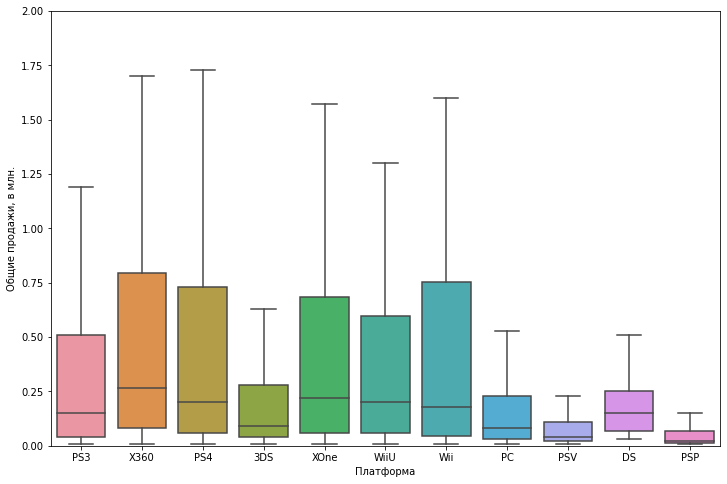

In [40]:
# создадим график "ящик с усами" по сводной таблице по общим продажам игр по платформам
plt.subplots(figsize=(12, 8))
plt.ylim(0, 2)
sns.boxplot(data=actual_period, x='platform', y='total_sales', showfliers=False)
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, в млн.')
plt.show()

In [41]:
# посмотрим на числовое описание данных нашего актуального периода сгруппированного по платформе и общим продажам
actual_period.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Тут мы видим, что наиболее успешно продаются игры на платформах - PS3, PS4, X360 и XOne.
Также видно, что почти на всех платформах большая часть значений выше медианного. Выбросы отчасти можно объяснить выпуском эксклюзивных игр на определенные платформы. Ещё тут есть интересная особенность у XOne. Она хоть и вышла в один год вместе с основным конкурентом - PS4, но в отличии от неё у XOne есть обратная совместимость с X360, т.е. игры на X360 можно запустить и на XOne. У PS4 неполучится также сделать с играми выпущенными на PS3.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Так как у нас много пропусков в столбцах с оценками критиков и пользователей, то посмотрим реальное количество оценок за наш "актуальный период" выше 0 (игры без оценок сюда не входят).

In [42]:
# Посмотрим на количество имеющихся оценок критиков и пользователей за "актуальный период"
print(len(actual_period.query('critic_score > 0')))
print(len(actual_period.query('user_score > 0')))

991
1192


In [43]:
# Посмоторим на количество имеющихся оценок у критиков и пользователей по каждой игре за "актуальный период"
print(len(actual_period.query('critic_score > 0 & user_score > 0')))

976


Возьмём 4 основных платформы для исследования диаграмм рассеяния и матриц корреляций влияния оценок критиков и пользователей на продажи.

4 платформы: PS3, PS4, X360 и XOne.

PS3

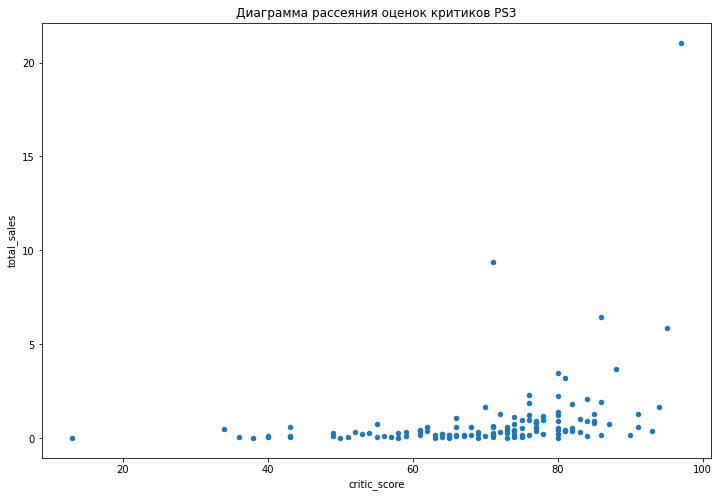

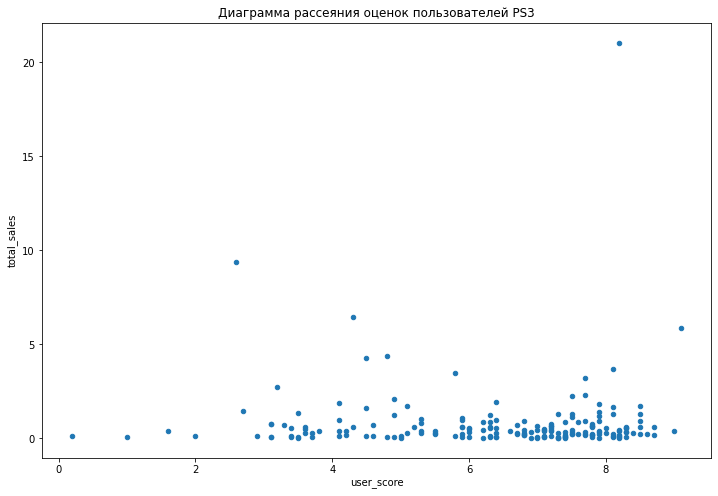

In [44]:
# Построим диаграмму рассеяния для PS3
ps3_critic = actual_period.query("platform == 'PS3' and critic_score > 0")
ps3_user = actual_period.query("platform == 'PS3' and user_score > 0")

ps3_critic.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок критиков PS3')
plt.show()
ps3_user.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок пользователей PS3')
plt.show()

По диаграммам рассеяния видно, что чем выше оценка критиков, тем больше продаж у игр. Оценки пользователей в целом также распределены, но есть небольшие выбросы с высокими продажами и низкими оценками.

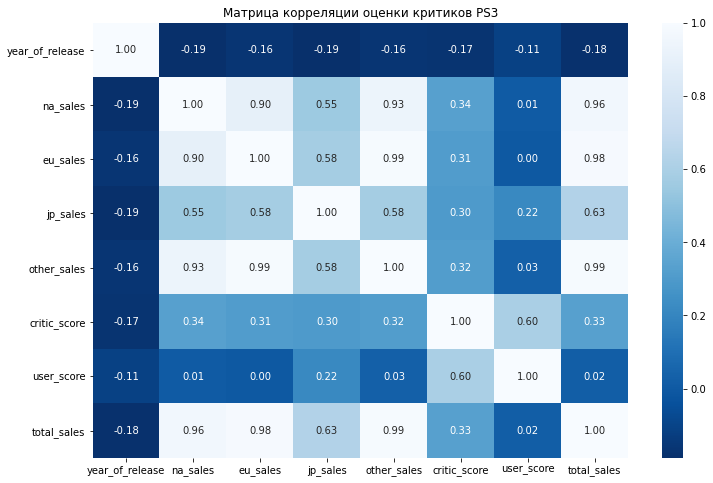

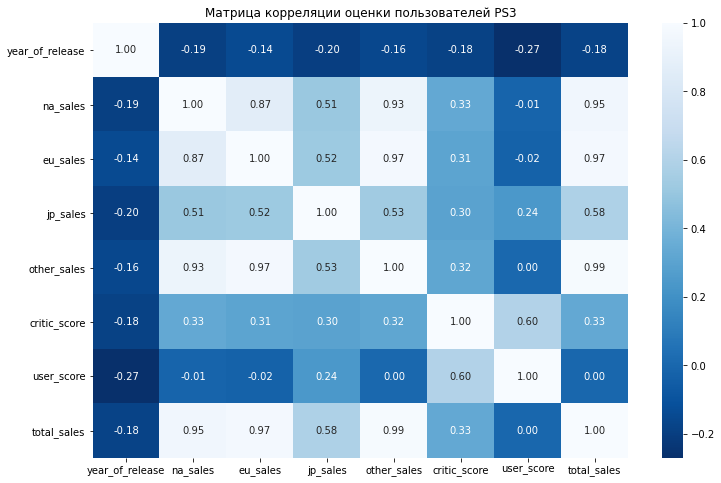

In [45]:
# Посмотрим на матрицу корреляции PS3
plt.figure(figsize=(12,8))
sns.heatmap(ps3_critic.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки критиков PS3')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(ps3_user.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки пользователей PS3')
plt.show()

По матрице корреляции видно, что оценки критиков имеют влияние на продажи игр, больше всего в северной америке - 0,34 и общие продажи - 0,33. Оценки пользователей практически не влияют на продажи (корреляция нулевая или слабо отрицательная), кроме Японии (небольшое влияние имеется - 0,24).

PS4

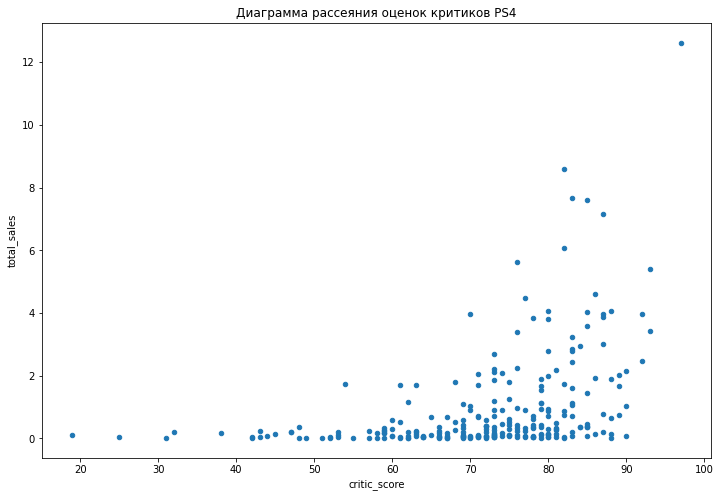

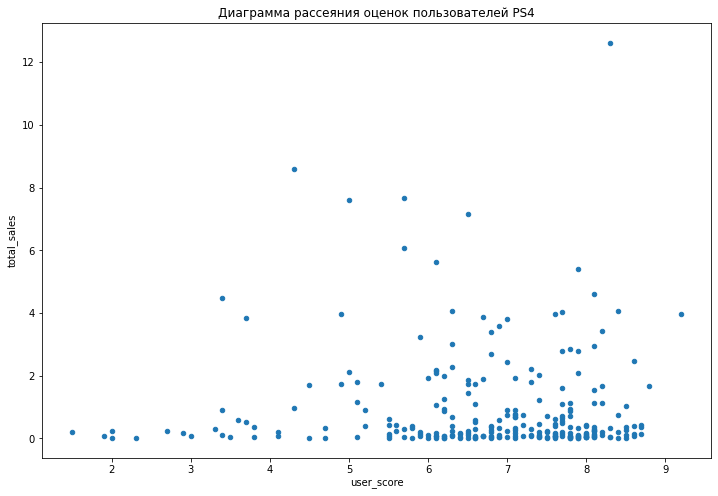

In [46]:
# Построим диаграмму рассеяния для PS4
ps4_critic = actual_period.query("platform == 'PS4' and critic_score > 0")
ps4_user = actual_period.query("platform == 'PS4' and user_score > 0")

ps4_critic.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок критиков PS4')
plt.show()
ps4_user.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок пользователей PS4')
plt.show()

По диаграммам рассеяния видно, что чем выше оценка критиков, тем больше продаж у игр. Оценки пользователей в целом также распределены, но есть небольшие выбросы с высокими продажами и низкими оценками. Т.к. PS4 относительно новая платформа, количество оценок достаточно небольшое.

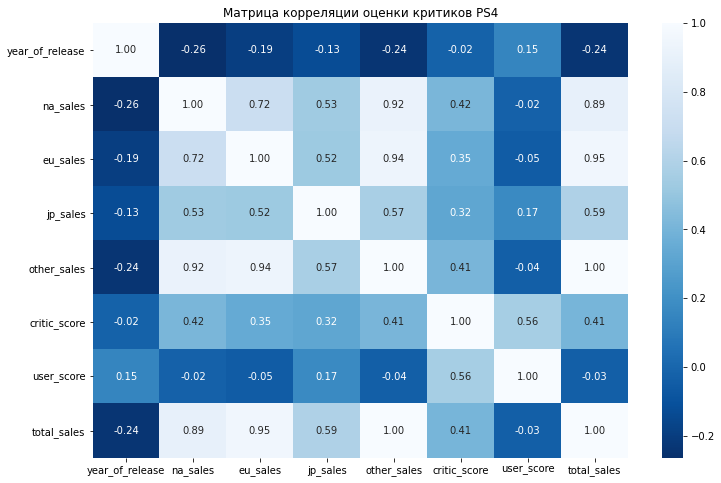

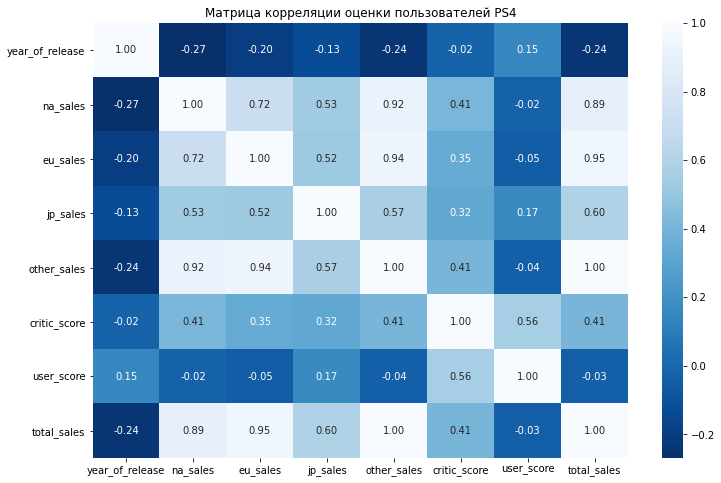

In [47]:
# Посмотрим на матрицу корреляции PS4
plt.figure(figsize=(12,8))
sns.heatmap(ps4_critic.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки критиков PS4')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(ps4_user.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки пользователей PS4')
plt.show()

По матрице корреляции видно, что оценки критиков имеют влияние на продажи игр, больше всего в северной америке - 0,42, в остальном мире и общие продажи по 0,41. Оценки пользователей не влияют на продажи (корреляция слабо отрицательная). Исключение в Японии - 0,17.

X360

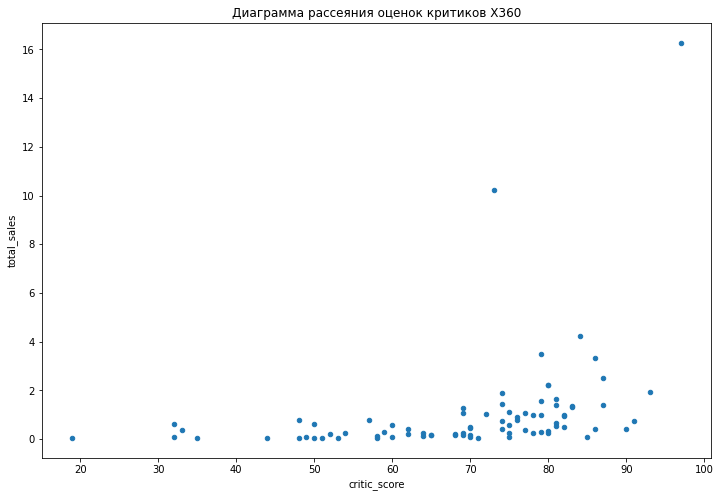

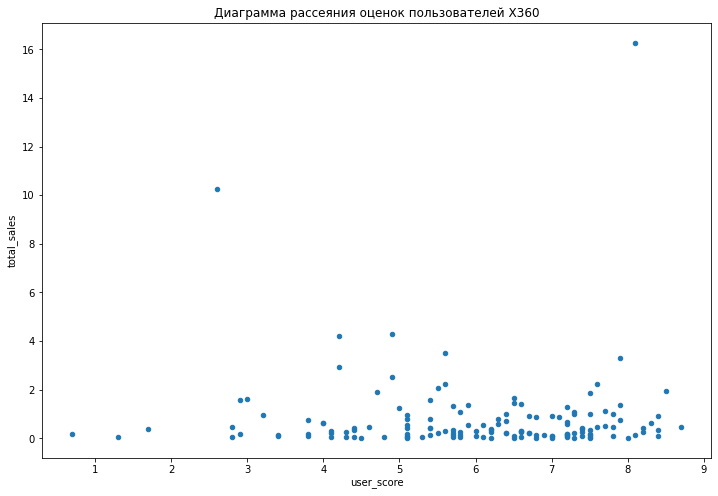

In [48]:
# Построим диаграмму рассеяния для X360
xbox_360_critic = actual_period.query("platform == 'X360' and critic_score > 0")
xbox_360_user = actual_period.query("platform == 'X360' and user_score > 0")

xbox_360_critic.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок критиков X360')
plt.show()
xbox_360_user.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок пользователей X360')
plt.show()

По диаграммам рассеяния видно, что чем выше оценка критиков, тем больше продаж у игр. Оценки пользователей в целом также распределены, но есть небольшие выбросы с высокими продажами и низкими оценками.

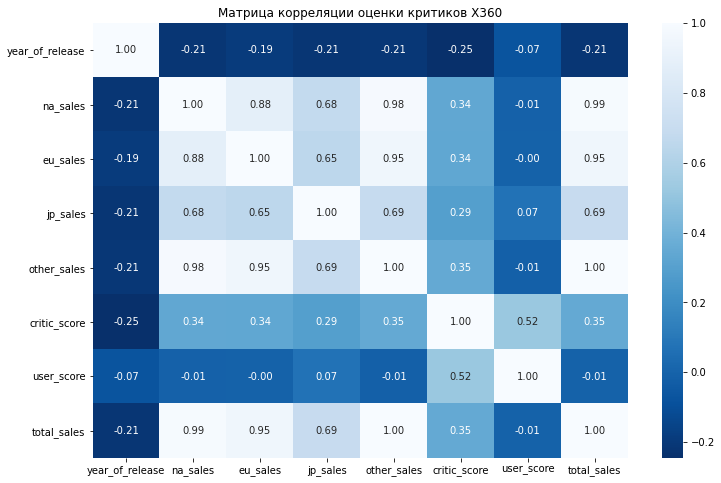

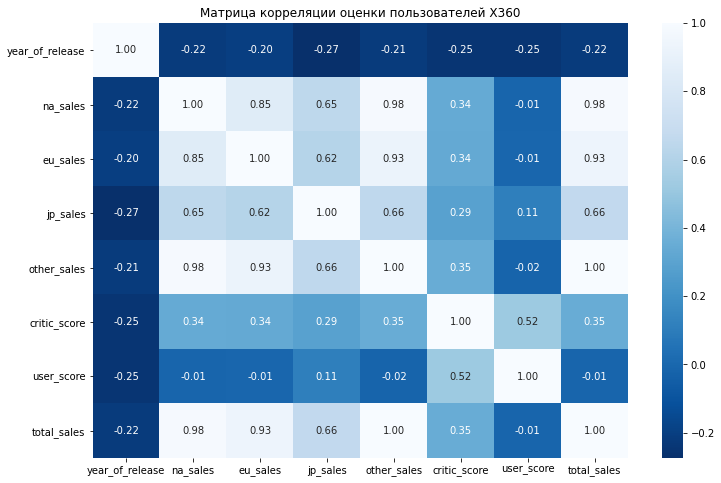

In [49]:
# Посмотрим на матрицу корреляции
plt.figure(figsize=(12,8))
sns.heatmap(xbox_360_critic.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки критиков X360')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(xbox_360_user.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки пользователей X360')
plt.show()

Из матриц корреляций видно, что оценки критиков имеют влияние на продажи, самое большое в остальном мире и общие продажи по 0,35. Оценки пользователей не влияют на продажи (корреляция слабо отрицательная и только в Японии - 0,11).

XOne

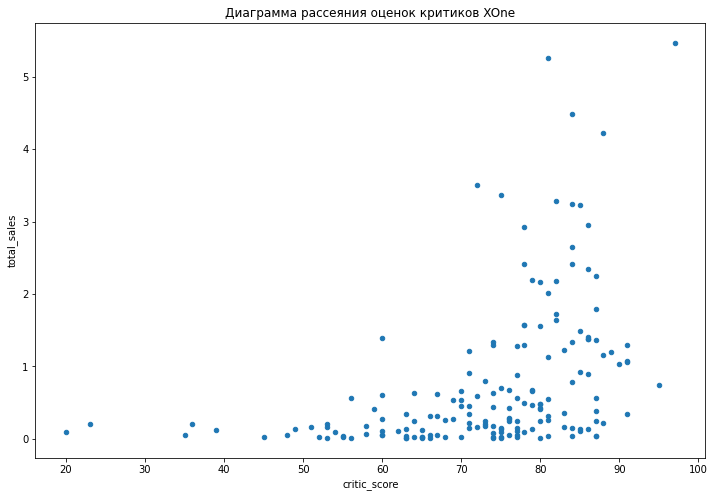

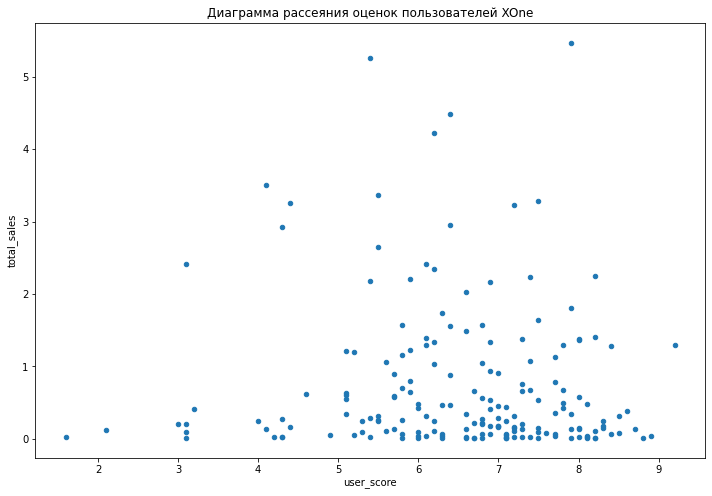

In [50]:
# Построим диаграмму рассеяния для XOne
xbox_one_critic = actual_period.query("platform == 'XOne' and critic_score > 0")
xbox_one_user = actual_period.query("platform == 'XOne' and user_score > 0")

xbox_one_critic.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок критиков XOne')
plt.show()
xbox_one_user.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок пользователей XOne')
plt.show()

По диаграммам рассеяния видно, что чем выше оценка критиков, тем больше продаж у игр. Оценки пользователей в целом также распределены, но есть небольшие выбросы с высокими продажами и низкими оценками. Т.к. XOne относительно новая платформа, количество оценок достаточно небольшое.

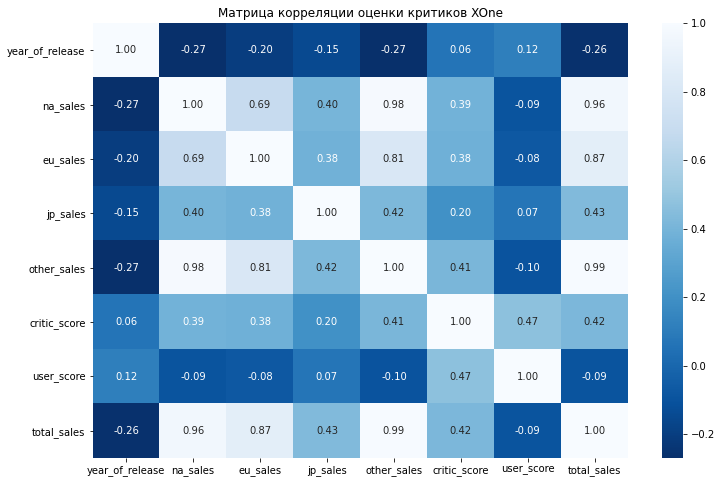

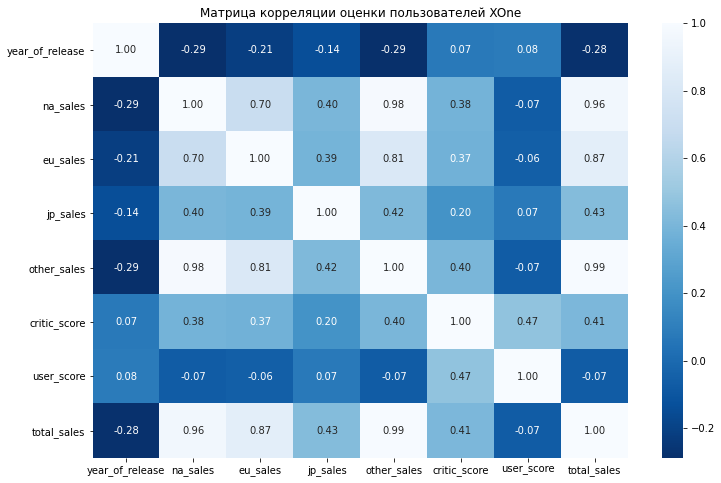

In [51]:
# Посмотрим на матрицу корреляции
plt.figure(figsize=(12,8))
sns.heatmap(xbox_one_critic.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки критиков XOne')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(xbox_one_user.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки пользователей XOne')
plt.show()

По матрице корреляции видно, что оценки критиков имеют влияние на продажи игр, больше всего у общих продаж и в остальном мире (0,42 и 0,41 соответственно). Оценки пользователей не влияют на продажи (корреляция слабо отрицательная и в Японии слабо положительная).

### Соотнеcём выводы с продажами игр на других платформах.

Посмотрим на диаграмму рассеяния и матрицу корреляции на двух других платформах:
- WiiU. Данная платформа идёт 5 по количеству продаж если смотреть на наш "ящик с усами" и не имеет продолжения в виде других поколений своей платформы (Nintendo Switch является продолжением, но была представлена только в октябре 2016 года, а выпущена в продажу в марте 2017 года, т.е. не входит во временной диапазон нашего исследования).
- PC. Данная платформа думаю будет жить "вечно", т.к. есть игры созданные только для PC и пользователи будут всегда играть в них на компьютерах/ноутбуках в подобные игры.

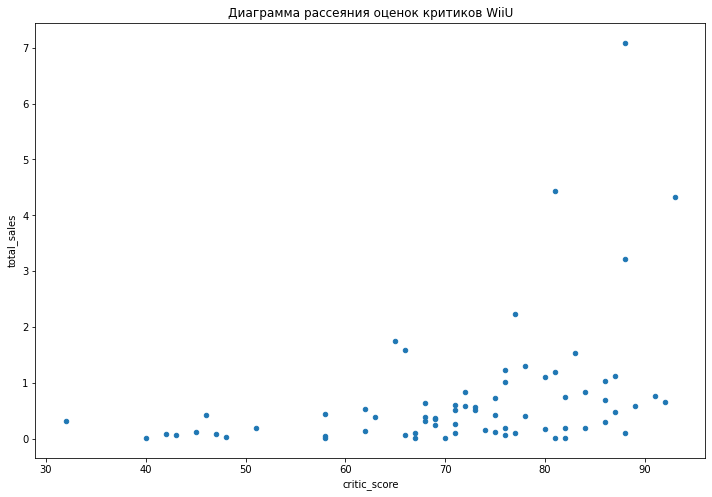

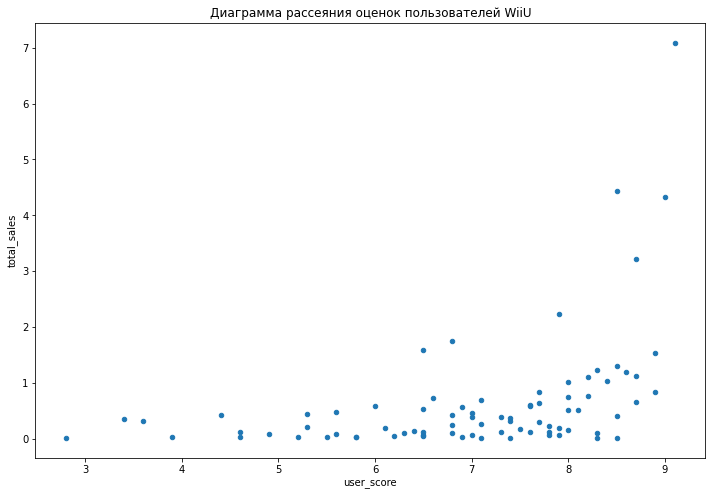

In [52]:
# Построим диаграмму рассеяния для WiiU
wiiu_critic = actual_period.query("platform == 'WiiU' and critic_score > 0")
wiiu_user = actual_period.query("platform == 'WiiU' and user_score > 0")

wiiu_critic.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок критиков WiiU')
plt.show()
wiiu_user.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок пользователей WiiU')
plt.show()

По диаграмме рассеяния видно, что также чем больше оценка, тем больше продажи, но тут выбросы по продажам очень похожи, что у критиков, то и у пользователей.

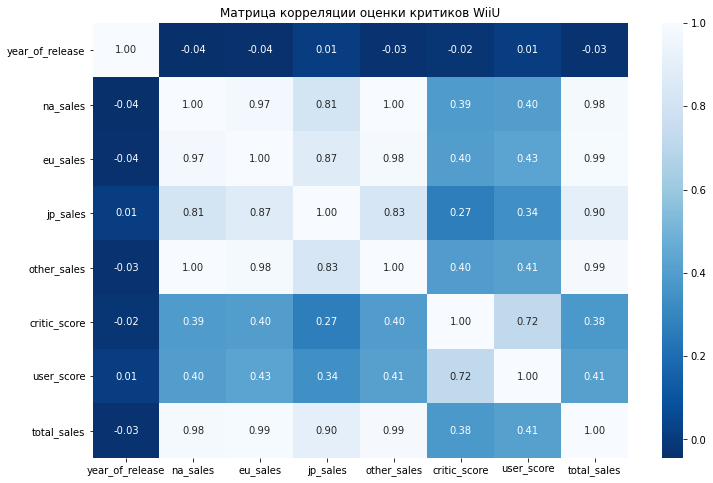

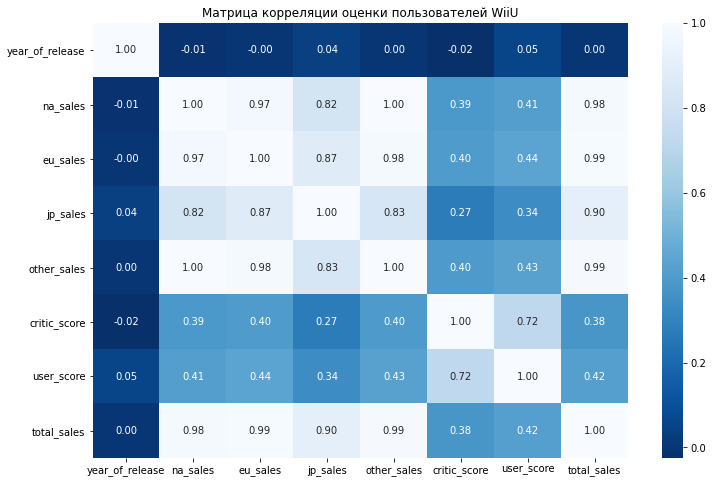

In [53]:
# Посмотрим на матрицу корреляции
plt.figure(figsize=(12,8))
sns.heatmap(wiiu_critic.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки критиков WiiU')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(wiiu_user.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки пользователей WiiU')
plt.show()

По матрице корреляции видно, что в целом как оценки критиков так и оценки пользователей имеют влияние на продажи, но тут оценки пользователей имеют даже чуть большее влияние чем оценки критиков.

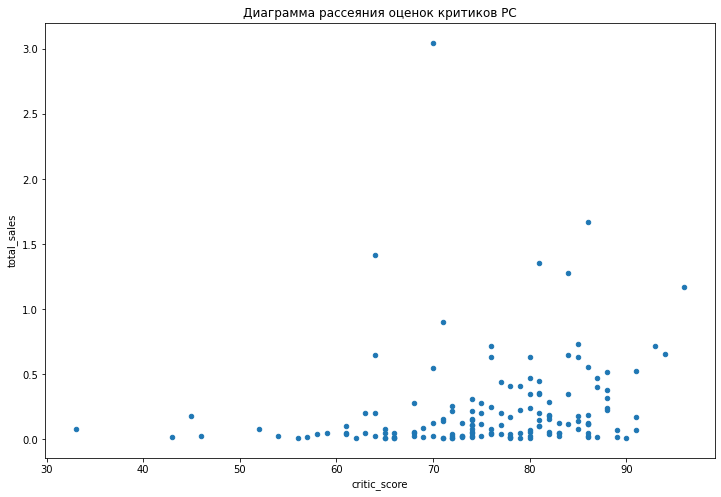

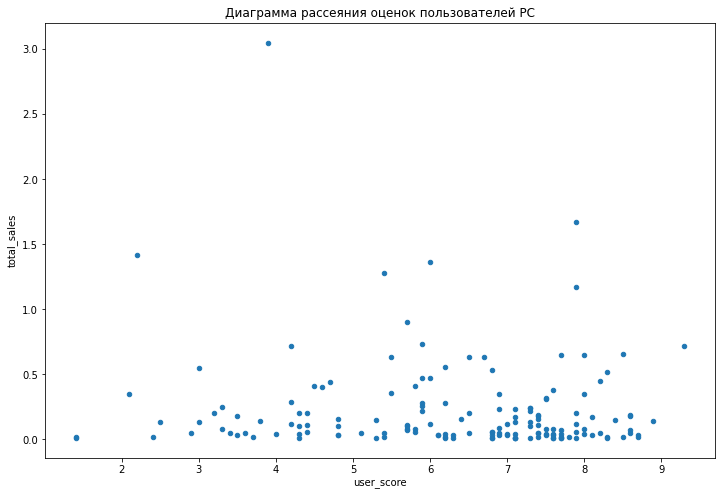

In [54]:
# Построим диаграмму рассеяния для PC
pc_critic = actual_period.query("platform == 'PC' and critic_score > 0")
pc_user = actual_period.query("platform == 'PC' and user_score > 0")

pc_critic.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок критиков PC')
plt.show()
pc_user.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12, 8))
plt.title('Диаграмма рассеяния оценок пользователей PC')
plt.show()

По диаграмме рассеяния видно, что чем больше оценка критиков, тем больше и продажи. Оценки пользователей в целом также распределены, но есть небольшие выбросы с высокими продажами и низкими оценками.

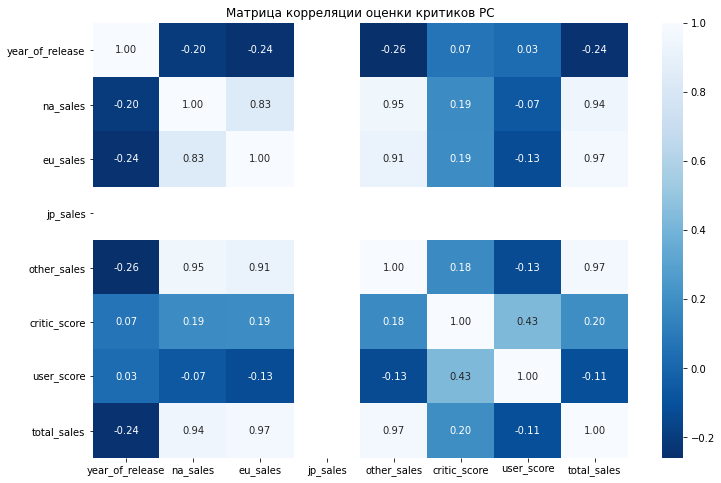

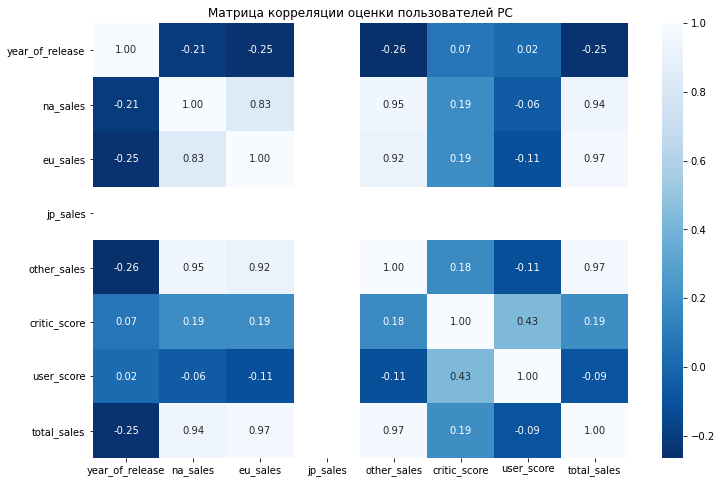

In [55]:
# Посмотрим на матрицу корреляции
plt.figure(figsize=(12,8))
sns.heatmap(pc_critic.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки критиков PC')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(pc_user.corr(), annot=True, cmap="Blues_r", fmt='.2f')
plt.title('Матрица корреляции оценки пользователей PC')
plt.show()

По матрице корреляции видно, что оценки критиков имеют небольшое влияние на продажи игр, больше всего в общих продажах - 0,29. Оценки пользователей не влияют на продажи (корреляция слабо отрицательная или нулевая).

### Посмотрим на общее распределение игр по жанрам.

Посмотрим на общее распределение игр по жанрам не по сумме общих продаж, а по медианному значению общих продаж.

In [56]:
# Создадим сводную таблицу по жанрам и общим продажам.
ap_genre = actual_period.pivot_table(index='genre', values='total_sales',
                                     aggfunc='median').sort_values(ascending=False, by='total_sales')

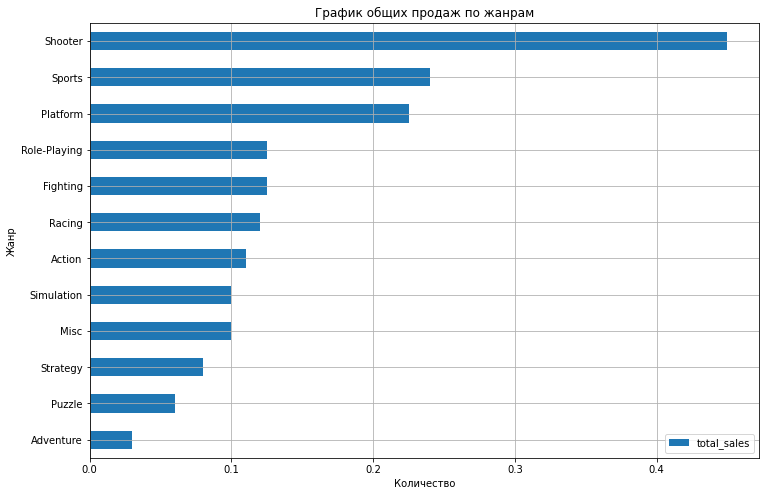

In [57]:
# Построим график по общему количеству продаж по жанрам
ap_genre.sort_values(by='total_sales').plot(kind='barh', figsize=(12, 8), grid=True)
plt.title('График общих продаж по жанрам')
plt.xlabel('Количество')
plt.ylabel('Жанр')
plt.show()

In [58]:
# посмотрим на конкретное количество общих продаж по жанрам
ap_genre

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


По графику мы видим, что самые популярные жанры по общим продажам: Shooter, Sports и Platform

Самые не популярные: Strategy, Puzzle и Adventure

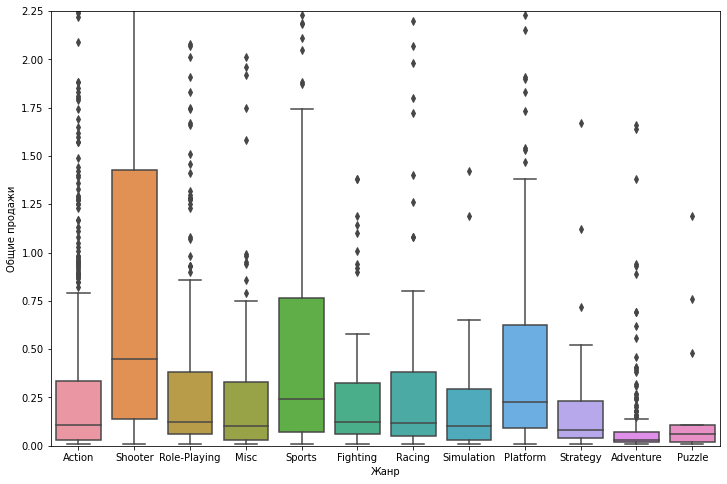

In [59]:
# построим диаграмму размаха по жанрам и общим продажам
plt.subplots(figsize=(12, 8))
plt.ylim(0, 2.25)
sns.boxplot(data=actual_period, x='genre', y='total_sales')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи')
plt.show()

Вывод

- рост выпуска видеоигр начался с 1995 года и достиг пика в 2008-2009 годах, далее пошёл небольшой спад. С 2012 года начался резкий спад
- самые популярные платформы за всё время: PS2, X360, PS3, Wii, DS и PS. На основе этих 6-ти платформ (назвали топ-6) мы выяснили, что средний "срорк жизни" платформы составляет 11 лет. Пик чаще всего приходится на середину "срока жизни", далее идёт спад
- определили актуальный период и определили потенцильно-прибыльные платформы: PS4 и XOne
- по "ящику с усами" определи на каких платформах наиболее успешно продаются видеоигры: PS3, PS4, X360 и XOne
- построили диаграммы рассеяния и матрицы корреляции между отзывами критиков, пользователей и продажами для 4 наиболее успешных платформ по продажам видеоигр: PS3, PS4, X360 и XOne. Оказалось, что оценки критиков имеют влияние на продажи, а оценки пользователей вообще не влияют (прям очень мало могут влиять в Японии).
- построили диаграммы рассеяния и матрицы корреляции между отзывами критиков, пользователей и продажами ещё для 2х платформ: WiiU и PC. Для PC также как и для ранее четырёх платформ оценки критиков имеют влияние на продажи, а оценки пользователей нет. Однако для платформы WiiU оценки как критиков так и пользователей имеют влияние на продажи, причём оценки пользователей даже больше чем оценки критиков.
- выявили самые популярные жанры по общим продажам: Shooter, Sports и Platform, а также самые не популярные: Strategy, Puzzle и Adventure. Самые популярные и не популярные жанры легко выделяются если посмотреть на график по общим продажам по жанрам.

## Составим портрет пользователя каждого региона

### Определим самые популярные платформы в каждом регионе

In [60]:
# Создадим сводную таблицу по платформе и продажам в Северной Америке
ap_na_platform = actual_period.pivot_table(index='platform', values='na_sales',
                                        aggfunc='sum').sort_values(ascending=False, by='na_sales')

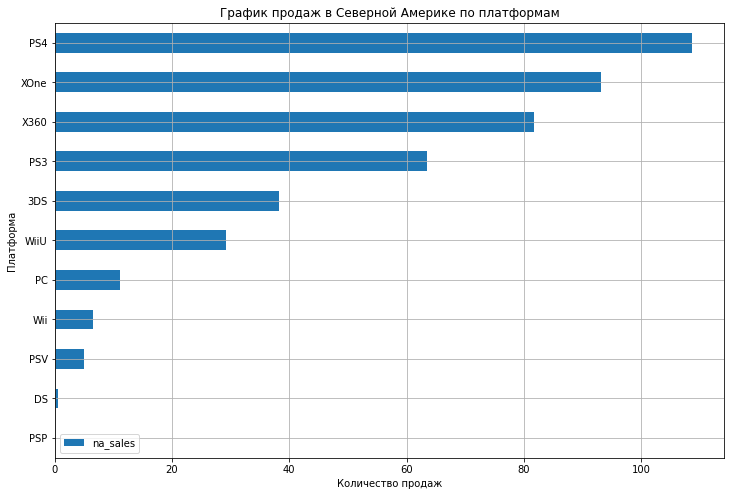

In [61]:
# Построим график по продажам в Северной Америке по каждой платформе
ap_na_platform.sort_values(by='na_sales').plot(kind='barh', figsize=(12, 8), grid=True)
plt.title('График продаж в Северной Америке по платформам')
plt.xlabel('Количество продаж')
plt.ylabel('Платформа')
plt.show()

In [62]:
# Посмотрим на числовые показатели топ-5 самых популярных платформ в Северной Америке
top_5_na = ap_na_platform.sort_values(by='na_sales', ascending=False).head()
top_5_na

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [63]:
# Создадим сводную таблицу по платформе и продажам в Европе
ap_eu_platform = actual_period.pivot_table(index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values(ascending=False, by='eu_sales')

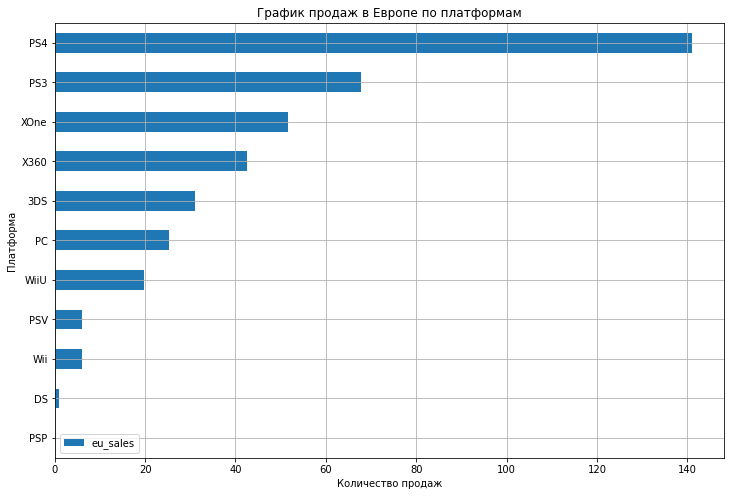

In [64]:
# Построим график по продажам в Европе по каждой платформе
ap_eu_platform.sort_values(by='eu_sales').plot(kind='barh', figsize=(12, 8), grid=True)
plt.title('График продаж в Европе по платформам')
plt.xlabel('Количество продаж')
plt.ylabel('Платформа')
plt.show()

In [65]:
# Посмотрим на числовые показатели топ-5 самых популярных платформ в Европе
top_5_eu = ap_eu_platform.sort_values(by='eu_sales', ascending=False).head()
top_5_eu

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [66]:
# Создадим сводную таблицу по платформе и продажам в Японии
ap_jp_platform = actual_period.pivot_table(index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values(ascending=False, by='jp_sales')

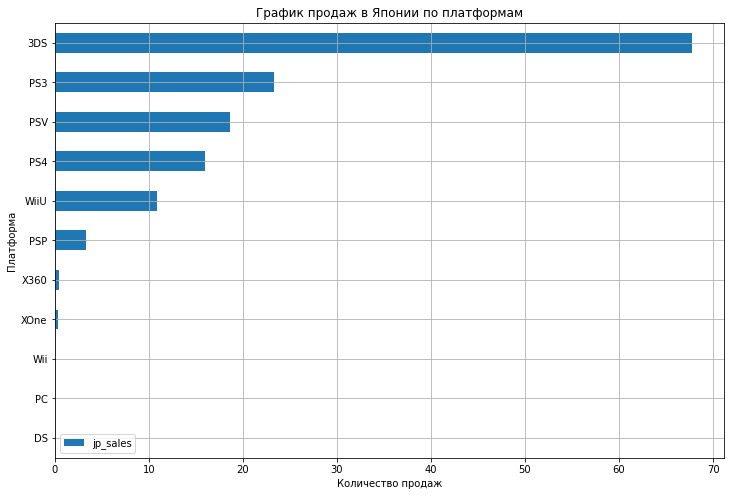

In [67]:
# Построим график по продажам в Японии по каждой платформе
ap_jp_platform.sort_values(by='jp_sales').plot(kind='barh', figsize=(12, 8), grid=True)
plt.title('График продаж в Японии по платформам')
plt.xlabel('Количество продаж')
plt.ylabel('Платформа')
plt.show()

In [68]:
# Посмотрим на числовые показатели топ-5 самых популярных платформ в Японии
top_5_jp = ap_jp_platform.sort_values(by='jp_sales', ascending=False).head()
top_5_jp

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Вывод:

- В Северной Америке в основном используют американскую платформу - X360, но использование японских платформ тоже высокое. В совокупе побольшей части даже используются японские платформы. В топ-5 - 4 японские платформы.
- В Европе используют как японские так и американские платформы. На первом месте идёт японская - PS3, на втором американская - X360. В топ-5 - 4 японские платформы.
- В Японии полное доминирование японских платформ. Только на 10 месте расположился - X360. Причём можно заметить, что в Японии в топ-5 находится 3 портативных платформы: DS, 3DS и PSP (Wii отнесём тут всё же к стационарным консолям таким как PS3 и X360).

В целом ничего особо удивительного в том, что в каком регионе популярнее та или иная платформа. Также стоит обратить внимание если не брать 'PC', то рынок представлен в основном японскими платформами. Только 2 из них американские которые могут составить конкуренцию - это X360 и XOne (который еще не набрал популярность).

### Определим самые популярные жанры в каждом регионе

In [69]:
# Создадим сводную таблицу по жанрам и продажам в Северной Америке
ap_na_genre = actual_period.pivot_table(index='genre', values='na_sales',
                                        aggfunc='sum').sort_values(ascending=False, by='na_sales')

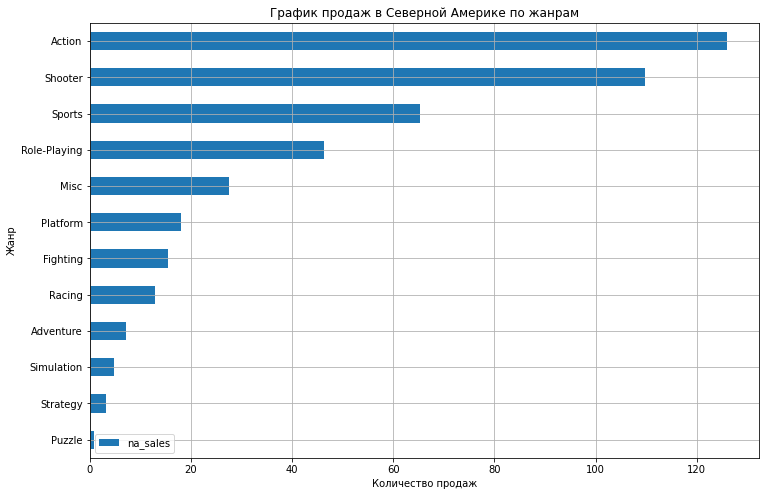

In [70]:
# Построим график по продажам в Северной Америке по жанрам
ap_na_genre.sort_values(by='na_sales').plot(kind='barh', figsize=(12, 8), grid=True)
plt.title('График продаж в Северной Америке по жанрам')
plt.xlabel('Количество продаж')
plt.ylabel('Жанр')
plt.show()

In [71]:
# Создадим сводную таблицу по жанрам и продажам в Европе
ap_eu_genre = actual_period.pivot_table(index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values(ascending=False, by='eu_sales')

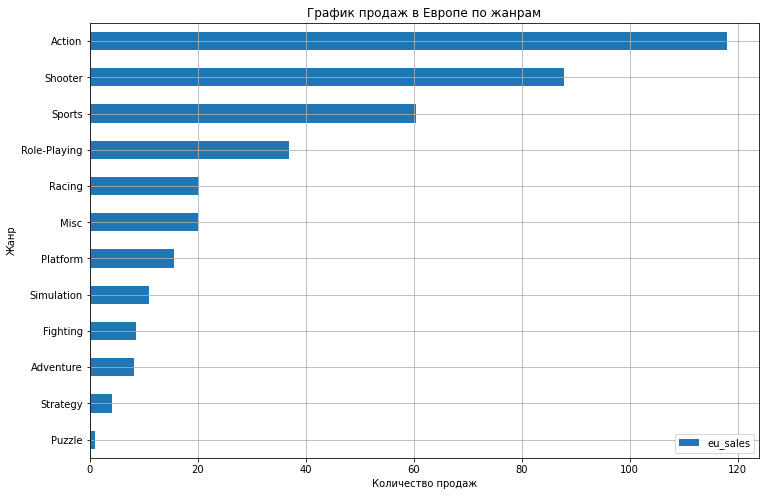

In [72]:
# Построим график по продажам в Европе по жанрам
ap_eu_genre.sort_values(by='eu_sales').plot(kind='barh', figsize=(12, 8), grid=True)
plt.title('График продаж в Европе по жанрам')
plt.xlabel('Количество продаж')
plt.ylabel('Жанр')
plt.show()

In [73]:
# Создадим сводную таблицу по жанрам и продажам в Японии
ap_jp_genre = actual_period.pivot_table(index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values(ascending=False, by='jp_sales')

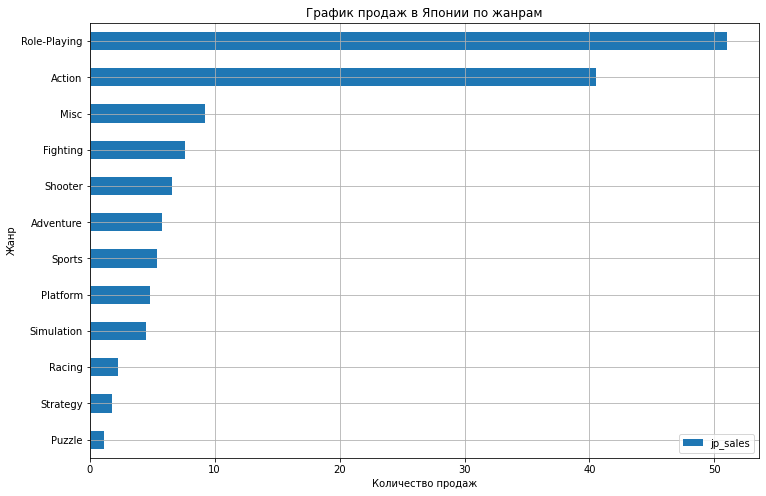

In [74]:
# Построим график по продажам в Японии по жанрам
ap_jp_genre.sort_values(by='jp_sales').plot(kind='barh', figsize=(12, 8), grid=True)
plt.title('График продаж в Японии по жанрам')
plt.xlabel('Количество продаж')
plt.ylabel('Жанр')
plt.show()

Вывод:

- В Северной Америке большего всего предпочитают жанры видеоигр такие как - экшн, спортивные и шутеры. Меньше всего любят играть в приключенческие игры, паззлы и стратегии.
- В Европе в целом такая же картина как и в Северной Америке.
- В Японии больше всего любят играть в ролевые игры, также экшн и разные жанры. Меньше всего играют в стратегии, гонки и также паззлы. Это связано скорее всего с тем, что в Японии развиты портативные консоли в которые можно играть. Это очень хорошо видно на графике продаж в Японии по платформам. Первое и второе место занимают портативные консоли Nintendo.

### Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [75]:
# Создадим переменную по которой построим таблицу рейтинга ESRB по продажам в отдельных регионах
ESRB = actual_period.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales','jp_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
Для лиц старше 10 лет,42.69,5.89,54.24
Для лиц старше 13 лет,41.95,20.59,49.79
Для лиц старше 17 лет,145.32,14.11,165.21
Нет рейтинга,78.91,85.05,89.42
Подходит для всех,83.36,15.14,79.05


Вывод: Да, рейтинг ESRB влияет на продажи в отдельных регионах.

- Видеоигры с рейтингом "для лиц старше 17 лет" имеет большего всего продаж в Европе и Северной Америке, а в Японии большинство продаж у видеоигр без рейтинга.
- Также продажи с рейтингом "подходит для всех" и продажи без рейтинга в Европе и Северной Америке примерно одинаковы. В Японии же рейтинг "подходит для всех" почти такой же как и "для лиц старше 17 лет".
- В Европе и Северной Америке продажи по возрастным критериям рейтингов " для лиц старше 10 лет" и "для лиц старше 13 лет" примерно одинаковы, в Японии же "для лиц старше 10 лет" меньше всего продаж.

Складывается впечатление, что в Японии люди любят конфиденциальность рейтинга. В этом думаю и есть основная причина самых высоких продаж видеоигр "без рейтинга".

Вывод:

- Самая популярная платформа в Северной Америке - Xbox 360 (американская), в Японии - Nintendo (японская). В Европе на первом месте - японская PS3, на втором - X360.
- Самые популярные жанры видеоигр в Северной Америке и Европе одинаковые в целом - экшн, спорт и шутер. В Японии больше всего любят ролевые игры, а в шутеры наоборот практически не играют.
- Рейтинг ESRB влияет на продажи в регионах. В Северной Америке и Европе больше всего покупают с рейтингом - "для лиц старше 17 лет", а в Японии - "без рейтинга".

## Проверка гипотез

### Гипотеза №1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [76]:
# Посмотрим на средние пользовательские рейтинги двух платформ
XOne_ur = actual_period[(actual_period['platform'] == 'XOne') & (actual_period['user_score'] > 0)]['user_score']
PC_ur = actual_period[(actual_period['platform'] == 'PC') & (actual_period['user_score'] > 0)]['user_score'] # ur - user rating
print('Средний пользовательский рейтинг платформы Xbox One:', XOne_ur.mean())
print('Средний пользовательские рейтинг платформы PC:', PC_ur.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательские рейтинг платформы PC: 6.2696774193548395


Формулируем гипотезы:

H0: XOne_ur = PC_ur (средний пользовательский рейтинг Xbox One и PC одинаковые, т.е. равны)

H1: XOne_ur != PC_ur (средний пользовательский рейтинг Xbox One и PC разные, т.е. неравны)

In [77]:
# проверяем гипотезу
alpha = 0.05

results = st.ttest_ind(XOne_ur, PC_ur, equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: Отвергаем нулевую гипотезу, т.к. пользовательские рейтинги Xbox One и PC не разные.

### Гипотеза №2

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [78]:
# 
Action_ur = actual_period[(actual_period['genre'] == 'Action') & (actual_period['user_score'] > 0)]['user_score']
Sports_ur = actual_period[(actual_period['genre'] == 'Sports') & (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action_ur.mean())
print('Средний пользовательские рейтинг жанра Sports:', Sports_ur.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательские рейтинг жанра Sports: 5.238124999999999


Формулируем гипотезы:

H0: Action_ur = Sports_ur (средний пользовательский рейтинг жанров Action и Sports одинаковые, т.е. равны)

H1: Action_ur != Sports_ur (средний пользовательский рейтинг жанров Action и Sports разные, т.е. неравны)

In [79]:
# проверяем гипотезу
alpha = 0.05

results = st.ttest_ind(Action_ur, Sports_ur, equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод: Отвергаем нулевую гипотезу, т.к. пользовательские рейтинги жанров Action и Sports разные.

### Пояснение по гипотезам

1. Как вы сформулировали нулевую и альтернативную гипотезы

- в 1 гипотезе говорится об равенстве пользовательских рейтингов двух платформ. Нулевая гипотеза была составлена, что пользовательские рейтинги двух платформ одинаковые. Альтернативную гипотезу взял как противоположную нулевой, т.е. о неравенстве пользовательских рейтингов двух платформ (они разные).
- во 2 гипотезе говорится об неравенстве пользовательских рейтингов двух жанров. Нулевая гипотеза была составлена, что пользовательские рейтинги двух жанров одинаковые. Альтернативную гипотезу взял как противоположную нулевой, т.е. о неравенстве пользовательских рейтингов двух жанров (они разные).

2. Какой критерий применили для проверки гипотез и почему

- в двух этих гипотезах проверяются гипотезы о равенстве средних двух генеральных совокупностей.
- уровень статической значимости взял в обоих случаях равный 5% (alpha = 0.05)
- equal_var указал в обоих случаях "False", т.к. не знаю равны ли дисперсии рассматриваемых генеральных совокупностей.

## Общий вывод

- Изучили датафрейм, прочитали общую информацию
- Проверили на наличие дубликатов. Привели названия столбцов к нижнему регистру. Удалили пропуски где это было возможно. Изменили типы данных в столбцах. Создали новый столбец с общими продажами
- После предобработки данных и проведя анализ, выявили, что:
    - рост выпуска видеоигр начался с 1995 года идостиг пика в 2008-2009 годах, далее спад.
    - самые популярные платформы: PS2, X360, PS3, Wii, DS и PS. На основе этих 6-ти платформ установили средний "срок жизни" платформы в 11 лет. Пик чаще приходится на середину жизни платформы.
    - определили по "ящику с усами" на каких платформах наиболее успешно продаются видеоигры: PS3, PS4, X360 и XOne.
    - на основе этой четвёрки построили диаграммы рассеяния и матрицы корреляции между отзывами критиков, пользователей и продаж. Везде у этой четвёрки отзывы критиков имеют влияние на продажи, а отзывы пользователей нет.
    - построили также для сравнения диаграммы рассеяния и матрицы корреляции для ещё двух платформ: WiiU и PC. У PC такая же картина как у ранее описанной четвёрки, а вот у WiiU совсем другое. Тут отзывы пользователей даже больше имеют влияние на продажи, чем отзывы критиков.
    - выявили самые популярные жанры.
- Составили портреты пользователей каждого региона.
    - самые популярные платформы в Северной Америке и в Европе в целом схожи, только в Северной Америке лидирует "национальная" платформа, а в Европе японская PS3. В Японии полное доминирование японских платформ, причём в отличии от Северной Америки и Европы очень популярны портативные консоли. Составили топ-5 по каждому региону.
    - самые популярные жанры в Северной Америке и в Европе почти в целом схожи. В топ-5 этих двух регионов только 5 место занимают разные жанры (в Северной Америке - ролевые игры, а в Европе - гонки). в Японии же больше всего любят ролевые игры. Это связано скорее всего с большой популярностью портативных платформ. Составили топ-5 по каждому региону.
    - рейтинг организации ESRB влияет на продажи в отдельном регионе. Если в Северной Америке и в Европе в целом достаточно схожи продажи по рейтингу ESRB, то в Японии совсем всё по-другому. Японцы за конфиденциальность видеоигр с рейтингами от данной организации.
- Проверили гипотезы.
    - 1 гипотеза. Нулевую гипотезу отвергли, т.к. пользовательские рейтинги Xbox One и PC разные.
    - 2 гипотеза. Нулевую гипотезу отвергли, т.к. пользовательские рейтинги жанров Action и Sports разные.
    
В Целом для Северной Америки и Европы можно использовать один и тот же подход с небольшими изменениями в плане рекламы, продвижения платформ, продаж по определённым жанрам игр и т.д.. Для Японии нужен совершенно другой подход, тут кардинально почти всё.